**Silme**

In [41]:
import pandas as pd
import seaborn as sns

In [63]:
veri=sns.load_dataset("diamonds")
veri=veri.select_dtypes(include=["float64","int64"]) #sayısal verilere erişmek için tip seçimi gerçekleşitiriyor
veri.dropna() #eksik değerleri silmek için
veri.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [64]:
table_veri=veri["table"]

<AxesSubplot:xlabel='table'>

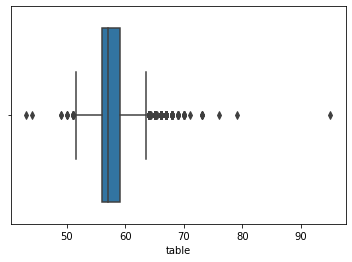

In [65]:
sns.boxplot(x=table_veri)

In [66]:
#eşik değer belirleniyor
Q1=table_veri.quantile(0.25)
Q3=table_veri.quantile(0.75)
IQR=Q3-Q1 # 1.çeyrek değerden 3.çeyrek değeri çıkardık

In [67]:
alt_sinir=Q1-1.5*IQR 
ust_sinir=Q3+1.5*IQR

In [68]:
aykiri_veri=(table_veri<alt_sinir)

In [69]:
table_veri[aykiri_veri]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [49]:
type(table_veri)

pandas.core.series.Series

In [50]:
table_veri.shape

(53940,)

In [51]:
#tilda koşulu saglamayanları al demiş olduk yani aykırı olmayyanları al demek.Koşulun dışındakileri getir demek

t_veri=table_veri[~((table_veri<(alt_sinir))|(table_veri>(ust_sinir)))]

In [52]:
t_veri

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [53]:
t_veri.shape #605 tane değer aykırı veri oldugu gözlemleniyor

(53335,)

**Ortalama İle Doldurma**

Aykırı değerleri ort değerlerle değiştirmek istiyoruz.

In [54]:
veri=sns.load_dataset("diamonds")
veri=veri.select_dtypes(include=["float64","int64"]) #sayısal verilere erişmek için tip seçimi gerçekleşitiriyor
veri.dropna() #eksik değerleri silmek için
veri.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [55]:
table_veri=veri["table"]

In [56]:
table_veri[aykiri_veri]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [57]:
table_veri.mean()

57.45718390804603

In [58]:
table_veri[aykiri_veri]=table_veri.mean()

C:\Users\buse\AppData\Local\Temp\ipykernel_10996\3746292478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_veri[aykiri_veri]=table_veri.mean()


In [60]:
table_veri[aykiri_veri]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

**Baskılama Yöntemi**

Üst taraftaysa üst sınır değerine eşitlenir alt taraftaysa alt sınır değerine eşitlenir.
Bir aykırı gözlem zaten veri setinin uçlarda oluşan değerdir.

In [70]:
table_veri[aykiri_veri]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [71]:
alt_sinir

51.5

In [72]:
table_veri[aykiri_veri]=alt_sinir

C:\Users\buse\AppData\Local\Temp\ipykernel_10996\4120948585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_veri[aykiri_veri]=alt_sinir


In [73]:
table_veri[aykiri_veri]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64